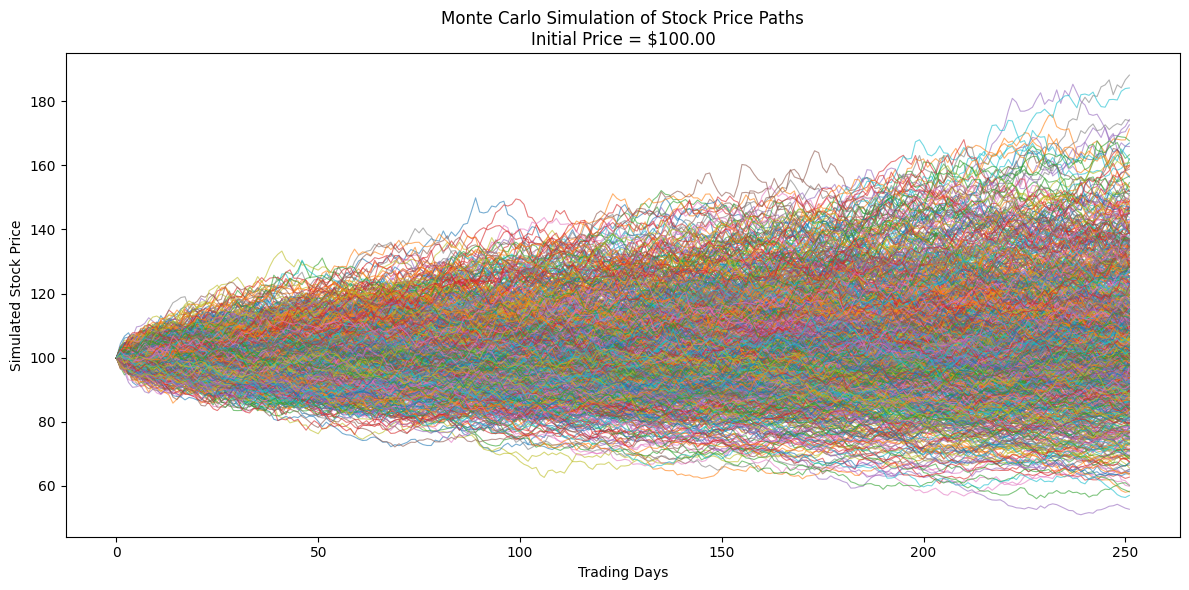

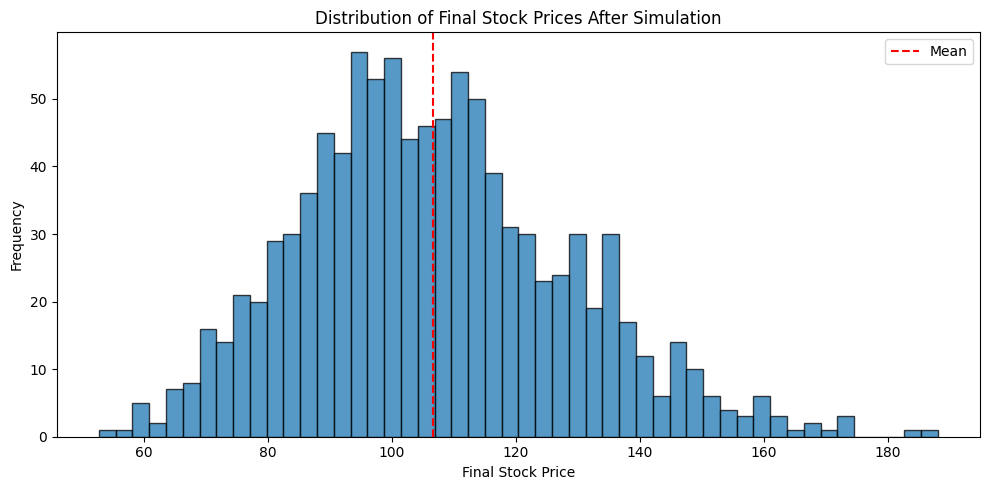


Summary of Final Prices:
Mean Final Price: $106.73
Standard Deviation: $21.68
95% Confidence Interval: [ 69.26196487 152.3436735 ]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Set matplotlib style
# plt.style.use('seaborn-whitegrid') # Commenting out the problematic line

def simulate_stock_price(
    initial_price=100.0,
    expected_return=0.07,
    volatility=0.2,
    time_horizon_days=252,
    num_simulations=1000
):

    dt = 1 / time_horizon_days
    prices = np.zeros((time_horizon_days, num_simulations))

    for sim in range(num_simulations):
        path = [initial_price]
        for t in range(1, time_horizon_days):
            drift = (expected_return - 0.5 * volatility**2) * dt
            shock = volatility * np.random.normal() * np.sqrt(dt)
            next_price = path[-1] * np.exp(drift + shock)
            path.append(next_price)
        prices[:, sim] = path

    return pd.DataFrame(prices)


def plot_simulations(price_df, initial_price):

    plt.figure(figsize=(12, 6))
    plt.plot(price_df, linewidth=0.8, alpha=0.6)
    plt.title(f"Monte Carlo Simulation of Stock Price Paths\nInitial Price = ${initial_price:.2f}")
    plt.xlabel("Trading Days")
    plt.ylabel("Simulated Stock Price")
    plt.tight_layout()
    plt.show()


def plot_final_distribution(price_df):

    final_prices = price_df.iloc[-1]
    plt.figure(figsize=(10, 5))
    plt.hist(final_prices, bins=50, edgecolor='black', alpha=0.75)
    plt.title("Distribution of Final Stock Prices After Simulation")
    plt.xlabel("Final Stock Price")
    plt.ylabel("Frequency")
    plt.axvline(final_prices.mean(), color='red', linestyle='dashed', linewidth=1.5, label='Mean')
    plt.legend()
    plt.tight_layout()
    plt.show()

    print("\nSummary of Final Prices:")
    print(f"Mean Final Price: ${final_prices.mean():.2f}")
    print(f"Standard Deviation: ${final_prices.std():.2f}")
    print("95% Confidence Interval:",
          np.percentile(final_prices, [2.5, 97.5]))


def main():
    # Simulation configuration
    initial_price = 100.0        # Starting stock price ($)
    expected_return = 0.07       # Annual expected return (7%)
    volatility = 0.2             # Annual volatility (20%)
    time_horizon_days = 252      # Number of trading days in a year
    num_simulations = 1000       # Number of simulations to run

    # Run the simulation
    price_df = simulate_stock_price(
        initial_price,
        expected_return,
        volatility,
        time_horizon_days,
        num_simulations
    )

    # Plot the simulated paths
    plot_simulations(price_df, initial_price)

    # Plot and analyze the distribution of final prices
    plot_final_distribution(price_df)


if __name__ == "__main__":
    main()